In [1]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv
from utils.helpers import *

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])
# df = df.drop(columns=['id'])

# View result
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [2]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [3]:
from utils.helpers import preprocessing
df = preprocessing(df)
df

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,0,0.695360,Ludhiana,1,Chef,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,-7.685383e-01,1.373585,1.256906,-0.623353,0,-1.363057,-0.699617,0,0
1,1,Vivan,1,-1.161867,Varanasi,1,Teacher,7.224761e-16,0.795334,2.724076e-15,1.466474e-15,2.018844e-02,0.450042,-1.230634,0.486299,1,0.193928,0.007793,0,1
2,2,Yuvraj,1,-0.596624,Visakhapatnam,0,Student,3.022283e+00,0.000000,2.011000e+00,-1.560194e+00,-3.502650e-16,-1.397045,1.256906,-1.067214,1,-0.844062,-1.407026,0,1
3,3,Yuvraj,1,-1.484863,Mumbai,1,Teacher,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,-1.557265e+00,0.450042,0.013136,-0.808295,1,0.972421,-1.407026,1,1
4,4,Rhea,0,-0.838871,Kanpur,1,Business Analyst,7.224761e-16,-1.588279,2.724076e-15,1.466474e-15,-1.557265e+00,-1.397045,-1.230634,-0.808295,1,0.712923,0.715203,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,0,-1.807859,Ahmedabad,1,Unemployed,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,8.089152e-01,-1.397045,-1.230634,-0.179492,0,-1.103560,0.715203,1,1
140696,140696,Lata,0,0.049368,Hyderabad,1,Content Writer,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,8.089152e-01,-0.473501,0.013136,-0.956249,1,-0.065570,1.422613,1,0
140697,140697,Aanchal,0,-1.323365,Kolkata,1,Marketing Manager,7.224761e-16,0.000796,2.724076e-15,1.466474e-15,-1.557265e+00,1.373585,0.013136,-1.141191,0,-0.584565,0.715203,0,0
140698,140698,Prachi,0,0.695360,Srinagar,1,Plumber,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,-7.685383e-01,-1.397045,0.013136,1.263056,1,0.972421,-1.407026,0,0


In [4]:
# #Now we want to split it into 2 datasets, students and workers
# students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
# working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

# display(students_df)

In [5]:
# from OurModels import LinearRegressionModel
# model = LinearRegressionModel()
# modelResults = model.train(students_df)
# model.output(*modelResults)  # unpack y_pred, y_test
# model.charts(*modelResults)
df

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,0,0.695360,Ludhiana,1,Chef,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,-7.685383e-01,1.373585,1.256906,-0.623353,0,-1.363057,-0.699617,0,0
1,1,Vivan,1,-1.161867,Varanasi,1,Teacher,7.224761e-16,0.795334,2.724076e-15,1.466474e-15,2.018844e-02,0.450042,-1.230634,0.486299,1,0.193928,0.007793,0,1
2,2,Yuvraj,1,-0.596624,Visakhapatnam,0,Student,3.022283e+00,0.000000,2.011000e+00,-1.560194e+00,-3.502650e-16,-1.397045,1.256906,-1.067214,1,-0.844062,-1.407026,0,1
3,3,Yuvraj,1,-1.484863,Mumbai,1,Teacher,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,-1.557265e+00,0.450042,0.013136,-0.808295,1,0.972421,-1.407026,1,1
4,4,Rhea,0,-0.838871,Kanpur,1,Business Analyst,7.224761e-16,-1.588279,2.724076e-15,1.466474e-15,-1.557265e+00,-1.397045,-1.230634,-0.808295,1,0.712923,0.715203,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,0,-1.807859,Ahmedabad,1,Unemployed,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,8.089152e-01,-1.397045,-1.230634,-0.179492,0,-1.103560,0.715203,1,1
140696,140696,Lata,0,0.049368,Hyderabad,1,Content Writer,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,8.089152e-01,-0.473501,0.013136,-0.956249,1,-0.065570,1.422613,1,0
140697,140697,Aanchal,0,-1.323365,Kolkata,1,Marketing Manager,7.224761e-16,0.000796,2.724076e-15,1.466474e-15,-1.557265e+00,1.373585,0.013136,-1.141191,0,-0.584565,0.715203,0,0
140698,140698,Prachi,0,0.695360,Srinagar,1,Plumber,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,-7.685383e-01,-1.397045,0.013136,1.263056,1,0.972421,-1.407026,0,0


In [6]:
# from OurModels import LogisticRegressionModel
# model = LogisticRegressionModel()
# results = model.train(df)
# model.report(*results)


In [7]:
# newdf = preprocessing(pd.read_csv(os.environ['TEST_LOCATION']))

# test = model.predict(newdf)

# generate_submission(test)

In [8]:
# print(test.shape)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:31:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


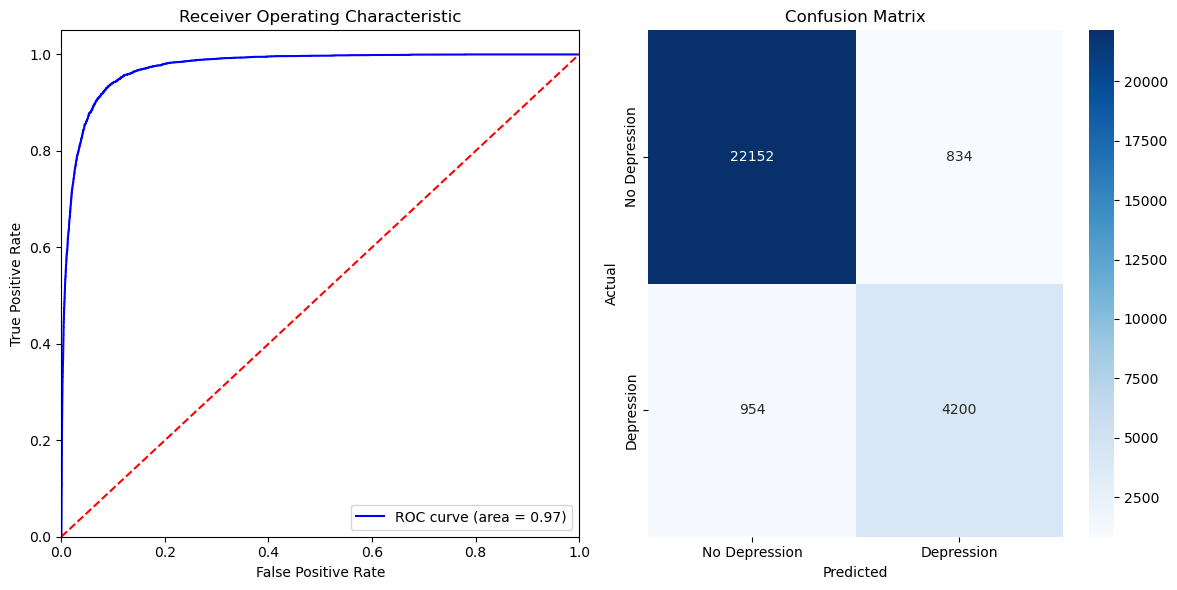

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22986
           1       0.83      0.81      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140

Model Accuracy: 0.94
Submission saved to: /Users/nikan/Desktop/School/Sems/Spring 2025/COS 322/COS322-depression/data/Results/submission.csv


In [9]:
from OurModels import XGBoostModel
model = XGBoostModel()
results = model.train(df)
model.report(*results)
newdf = preprocessing(pd.read_csv(os.environ['TEST_LOCATION']))

test = model.predict(newdf)

generate_submission(test)